# **_Complex Eigenvalue Art_**

_Harvest complex eigenvalues from random matrices, make something funky..._

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Intro_**

This notebook contains challenges I completed for Mike X. Cohen's Linear Algebra course on Udemy.

My work isn't super-sophisticated or anything, just a chance to practice and a have a quick-reference.

Visit Mike's course here:

-   [**_Udemy Course_**](https://www.udemy.com/course/linear-algebra-theory-and-implementation)

-   [**_Mike X. Cohen's Website_**](https://www.mikexcohen.com/)

This course is helping not only with Linear Algebra, but has significantly improved my coding skills.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 90%;">


## **_Code_**

In [7]:
# Import required libraries:
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
from random import choice, choices

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

### **_Begin with this exercise:_**

Confirm that the diagonal values of a triangular matrix match that matrix's eigenvalues.

In [8]:
def tridiagvals_vs_eigenvals(size_n, mat_type="diagonal"):
    """Checks the equality of a triangular matrix's diagonal
    values with its eigenvalues."""
    # Create base matrix:
    X = np.random.randint(1, 10, (size_n, size_n))

    # Transform into indicated variety of triangular matrix:
    if mat_type == "upper":
        TRI_MATRIX = np.triu(X)
    elif mat_type == "lower":
        TRI_MATRIX = np.tril(X)
    else:
        TRI_MATRIX = np.diag(np.diag(X))

    # Get diagonal values, sort:
    diagonal_vals = sorted(np.diag(TRI_MATRIX))
    # Get eigenvalues, sort:
    eigenvals = sorted(np.linalg.eig(TRI_MATRIX)[0])
    # Check sorted values match:
    eq_check = np.allclose(diagonal_vals, eigenvals)

    # Display confirmation of equality:
    eq_str = f"Do a {size_n}x{size_n} triangular ({mat_type})"
    eq_str += f" matrix's diagonal values equal its eigenvalues?\n===>"
    eq_str += f" {["NO", "YES"][eq_check]}\n"

    return eq_str

In [9]:
# Run some randomized tests with random triangular
#  matrix types and random matrix sizes:
for _ in range(5):
    mat_size_n = np.random.randint(2, 1000)
    matrix_type = choice(["diagonal", "upper", "lower"])
    print(tridiagvals_vs_eigenvals(mat_size_n, matrix_type))

Do a 591x591 triangular (upper) matrix's diagonal values equal its eigenvalues?
===> YES

Do a 499x499 triangular (lower) matrix's diagonal values equal its eigenvalues?
===> YES

Do a 994x994 triangular (lower) matrix's diagonal values equal its eigenvalues?
===> YES

Do a 254x254 triangular (lower) matrix's diagonal values equal its eigenvalues?
===> YES

Do a 208x208 triangular (diagonal) matrix's diagonal values equal its eigenvalues?
===> YES



<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

### **_Continue With This Project:_**

Extract/accumulate the eigenvalues for a large, random matrix.

- Make a plot

Run this experiment many times, see what shape emerges.

Play around with the code and make something colorful and psychedelic.

In [ ]:
def random_rgb(c_list):
    """Returns a randomized RGB value
    based on preexisting list options."""
    return (
        choice(c_list),
        choice(c_list),
        choice(c_list),
    )

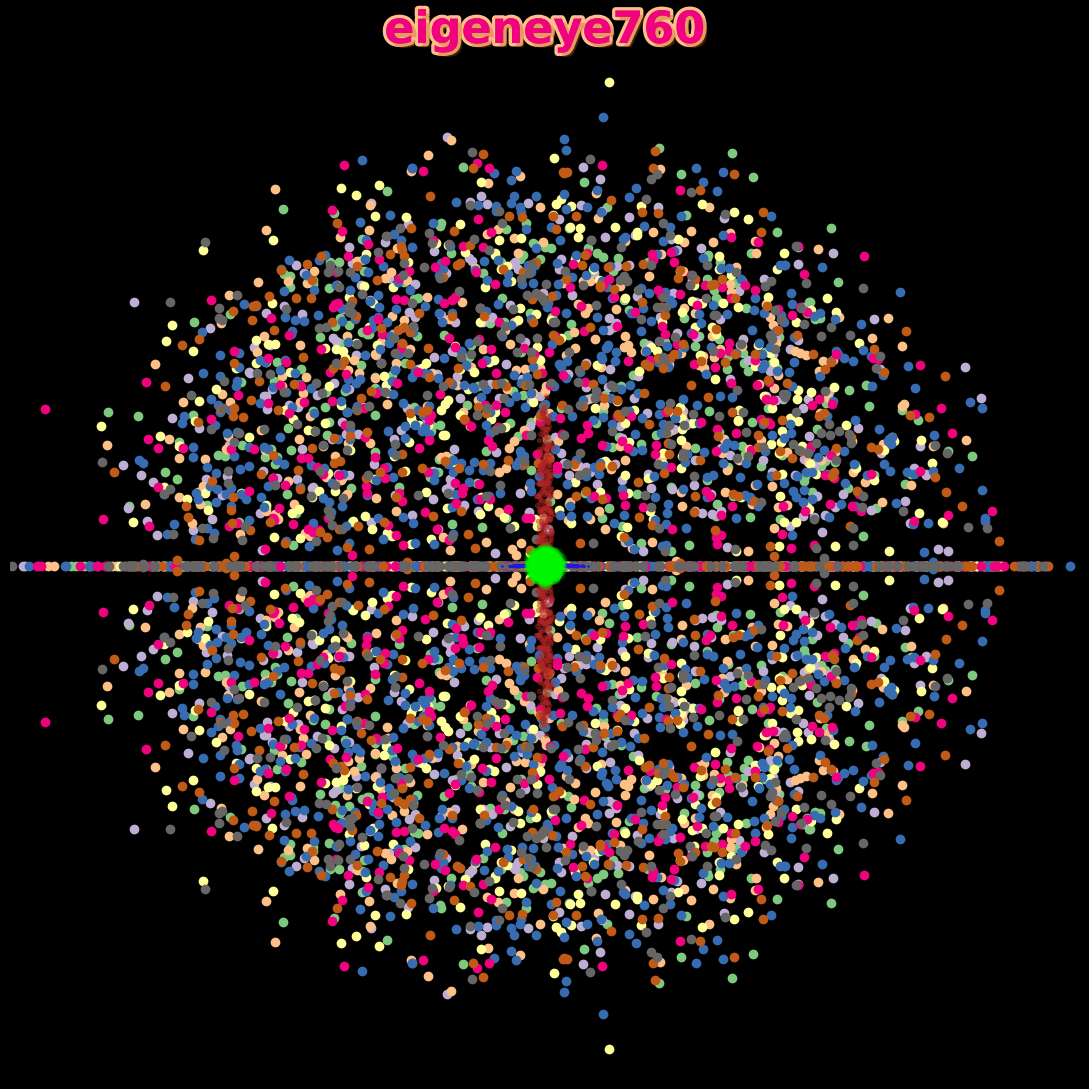

In [11]:
# Number of times to layer the eigenvalues. More
#  times helps clarify the emergent shape:
LAYERS = 10
# Track the maximum value for plot limits:
max_val = 0

# Number of rows/columns we use to build plotted
#  matrices which are built from harvested
#  eigenvalues of random matrices:
EIG_ROWS = 25
EIG_COLS = 25

# Use built-in colormaps to derive main plots colors.
#  Choose from this randomly in main plot below:
cmap_name = choice(plt.colormaps())
cmap = plt.get_cmap(cmap_name)
main_colors = cmap(np.linspace(0, 1, LAYERS, endpoint=False))

# One plot for everything, state here, show once at the end:
plt.figure(figsize=(11, 11), facecolor="black")

# Main plot. Not significantly processed. Demonstrates
#  true circular shape of repeated plotting of random
#  eigenvalues:
for true_shape in range(1, LAYERS):
    # Real and imaginary zeros matrices to populate:
    REAL_EIGS = np.zeros((EIG_ROWS, EIG_COLS))
    IMAG_EIGS = np.zeros((EIG_ROWS, EIG_COLS))

    # Embedded loop. harvests real and imaginary
    #  eigenvalues from a new random matrix.
    #  Populates zeros matrices by row:
    for row in range(EIG_ROWS):
        M = np.random.randn(EIG_COLS, EIG_COLS)
        # The harvested eigenvalues start out as mainly
        #  complex, begin there:
        eigs_complex_vect = np.linalg.eig(M)[0] * 25
        # Extract the real and imaginary parts, populate
        #  the outer loop's zeros matrices:
        REAL_EIGS[row, :] = np.real(eigs_complex_vect)
        IMAG_EIGS[row, :] = np.imag(eigs_complex_vect)

    # Track current max value for plot limits below:
    max_loop_val = max(np.max(REAL_EIGS), np.max(IMAG_EIGS))
    if max_loop_val > max_val:
        max_val = max_loop_val

    # Plot now, show later:
    plt.plot(REAL_EIGS, IMAG_EIGS, "o", color=main_colors[true_shape])

# Alternate plots, with significant scaling and
#  stretching. Takes main plot and creates
#  variation in color, scale and skew:
for alt_shape in range(1, LAYERS):
    # Formulas for determining color, should provide some
    #  interesing variety. Use in plots below:
    c_options = [
        (1 - ((alt_shape + 1) / LAYERS)) / 2,
        1 - ((alt_shape + 1) / LAYERS),
        (alt_shape + 1) / LAYERS,
    ]

    # Real and imaginary zeros matrices to populate:
    REAL_EIGS = np.zeros((EIG_ROWS, EIG_COLS))
    IMAG_EIGS = np.zeros((EIG_ROWS, EIG_COLS))

    # Embedded loop. harvests real and imaginary
    #  eigenvalues from a new random matrix.
    #  Populates zeros matrices by row:
    for row in range(EIG_ROWS):
        M = np.random.randn(EIG_COLS, EIG_COLS)
        # The harvested eigenvalues start out as mainly
        #  complex, begin there:
        eigs_complex_vect = np.linalg.eig(M)[0] * np.cbrt(alt_shape)

        # Keeping it simple for the real values. Take the real
        #  parts and populate the real matrix by row:
        REAL_EIGS[row, :] = np.real(eigs_complex_vect) * np.sin(alt_shape)

        # Offering variety, three options for imaginary parts
        #  of complex eigenvalues. Populate the outer loop's
        #  imaginary matrix by row:
        eigs_imag = np.imag(eigs_complex_vect)

        # Base shape/size on iteration value's modulo. Populate
        #  the imaginary matrix now, plot in next conditional
        #  block:
        if alt_shape % 3:
            IMAG_EIGS[row, :] = eigs_imag * np.cos(alt_shape) ** LAYERS
        elif alt_shape % 2:
            IMAG_EIGS[row, :] = eigs_imag * np.sin(alt_shape)
        else:
            IMAG_EIGS[row, :] = eigs_imag * np.cos(alt_shape) * alt_shape

    # Track current max value for plot limits below:
    max_loop_val = max(np.max(REAL_EIGS), np.max(IMAG_EIGS))
    if max_loop_val > max_val:
        max_val = max_loop_val

    # Cases which determine layout and color of plot. Depend
    #  on iteration value's modulo computation, as in the previous
    #  conditional re shape.
    if alt_shape % 3:
        alt_color = random_rgb(c_options)
        plt.plot(
            REAL_EIGS,
            IMAG_EIGS,
            ".",
            ms=LAYERS - alt_shape,
            color=alt_color,
            alpha=alt_shape / LAYERS,
        )
    elif alt_shape % 2:
        alt_color = random_rgb(c_options)
        plt.plot(
            IMAG_EIGS,
            REAL_EIGS,
            ".",
            ms=LAYERS + alt_shape,
            color=alt_color,
            alpha=1 - alt_shape / LAYERS,
        )
    else:
        alt_color = random_rgb(c_options)
        plt.plot(REAL_EIGS, IMAG_EIGS, ".", color=alt_color, alpha=1 - alt_shape / LAYERS)

# Set the title. Style randomly and programatically.
#  Derive number in title from random values in the
#  max_val variable:
title = plt.title(
    f"eigeneye{''.join(choices((str(max_val).replace('.', '')), k=3))}",
    size=32,
    c=choice(main_colors),
    fontweight="bold",
)
title.set_path_effects(
    [
        pe.withStroke(
            linewidth=5,
            foreground=choice(main_colors),
        ),
        pe.withSimplePatchShadow(
            offset=(3, -3),
            shadow_rgbFace=choice(main_colors),
            alpha=0.35,
        ),
    ]
)

# Tighten up the plot limits:
max_val -= 5
plt.axis((-max_val, max_val, -max_val, max_val))
plt.axis("off")
plt.tight_layout()

# Display!
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


Future improvements will include better manual control over shape, size, shift, stretch, skew, color...

Improve efficiency via functions or creation of a class/methods.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">


<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 80%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 70%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px orangered; width: 60%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 50%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px mediumorchid; width: 40%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Portfolio: https://www.andrewblais.dev/

</font>

<font size=1>

```python
# python
```

</font>

<font size=5 style="font-family: Courier; font-weight: 700; text-align: center; color: ivory; text-shadow: orangered 0.05rem 0.05rem 0.65rem, goldenrod 0.05rem -0.05rem 0.65rem, dodgerblue -0.05rem -0.05rem 0.65rem; magenta -0.05rem 0.05rem 0.65rem">

All stable processes we shall predict.
<br>

<font size=4>_All unstable processes we shall control._</font>

<font size=2>_JvN_</font>

</font>